In [2]:
import librosa
import librosa.display
import IPython.display

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### librosa로 wav 파일 불러오기

In [4]:
y,sr=librosa.load(r'C:\Users\han\Desktop\sample.wav')

### IPython으로 재생

In [5]:
IPython.display.Audio(data=y,rate=sr)

### y랑 sr값 확인

In [6]:
y

array([ 7.78899266e-05,  1.43822253e-04,  1.17864096e-04, ...,
        1.90860359e-03,  2.38692388e-03, -5.95575722e-04], dtype=float32)

In [7]:
sr

22050

### matplotlib으로 파형 확인해본다


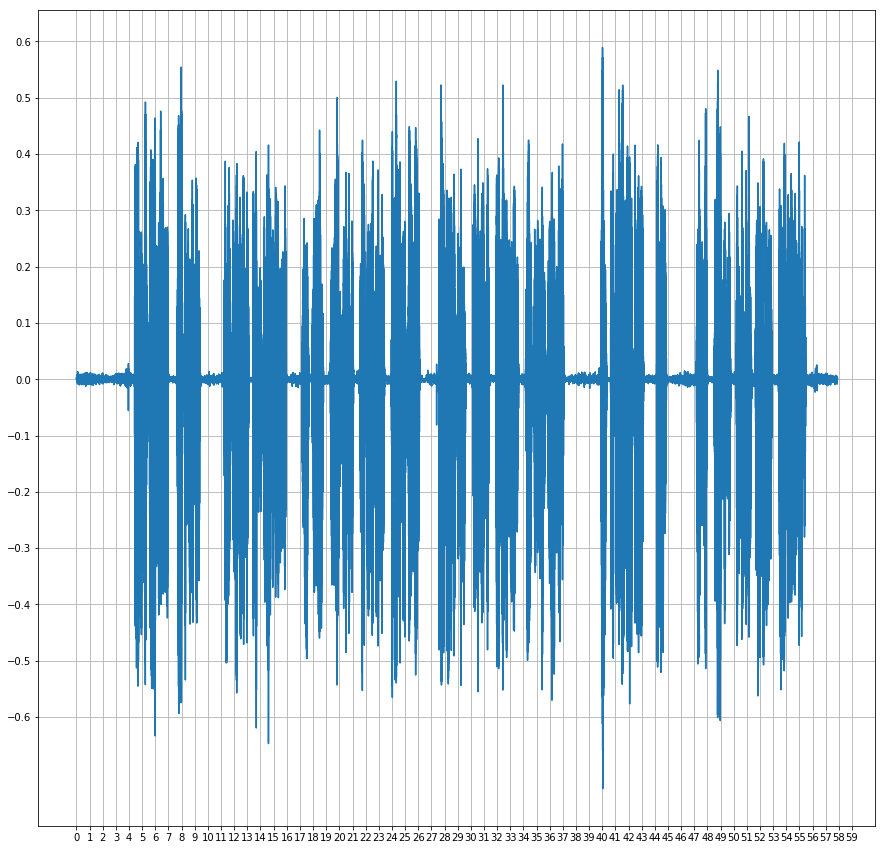

In [12]:
time=np.linspace(0,len(y)/sr,len(y))     

#np.linspace(a,b,c)  = a~b를 c간격으로 쪼갠다 이렇게하면 y랑 time이랑 1대1로 매핑되고 시간을 초단위로 볼수있음
#len(y)/sr=58.xxx 초정도됌

plt.figure(figsize=(15,15))
plt.plot(time,y)
plt.grid(True)
plt.xticks(range(0,60))
plt.yticks([-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6])
plt.show()

 파형을보니꺼 y값(세로축)을 묵음인 부분은 0.05밑으로 잡으면 될거같다.
 
그리고 문장간 간격이 3초라고 들었는데, 그거보단 짧은거같다. 

0.8초~1초정도면 문장간 분류가 가능할거같다.

첫번째문장, 두번째문장이 텀이 너무짧아서 분류가 어렵다.

(이샘플은 8문장 - 58초 짜리 샘플이다)

### 함수로 만들기

In [48]:
def silence_slice(address,seconds,limit=0.05):
    #address: 파일이 있는 주소
    #seconds: 침묵이 몇초 지속되면 한문장이 끝난걸로 볼것인가?
    #limit: 음파 높이가 몇 이하인 놈들을 침묵으로 볼것인가?
    
    y,sr=librosa.load(address)  #y=데시벨? 같은느낌 음파높이,  sr=rate

    index_list=[]   
    #silence가 지속되는 동안 계속여기에 값들을 append 해준다. 
    #len(index_list)가 몇초 이상지나면 한문장이 끝난걸로 볼수있다.   

    point=[]  #한문장이 끝나는 지점 , 이지점을 기준으로 잘라줄 예정이다.
    
    y_df=pd.DataFrame(y,columns=['y']) # y를 데이터프레임화
    
    
    silence=y_df.loc[abs(y_df.y)<limit]   # 파고가 limit미만인 애들을 silence라고 정의하고 이놈들만 추려준다.

    for i in range(len(silence.index)-1):
        index_list.append(silence.index[i])  
        if (silence.index[i]+1) != (silence.index[i+1]):   #만약 인덱스가 연속적이지 않다면(소리가 발생했다면)
            if len(index_list)/sr>seconds:                 #index_list 길이를 확인해서 seconds가 넘는다면,
                point.append(silence.index[i])             #그동안 유지된 silence는 문장사이의 침묵으로 보고 그부분에서 잘라준다.(point에 추가)  
                index_list=[]
            else:
                index_list=[]
                
    for k in range(len(point)-1):
        name='E:/ai/silence cut/cutfile{}.wav'.format(k)
        librosa.output.write_wav(name,y[point[k]:point[k+1]],sr)  #포인트 사이를 잘라서 저장해줌
    
    #마지막문장을 뽑아주기 위한 작업
    name='E:/ai/silence cut/cutfile{}.wav'.format(len(point)-1)
    librosa.output.write_wav(name,y[point[-1]:-1],sr) #마지막포인트 지점~ 끝까지 

### 테스트

In [50]:
address='C:/Users/han/Desktop/sample.wav'
silence_slice(address,seconds=0.7)  #0.7로 하니까 이쁘게 잘나옴

In [37]:
y,sr=librosa.load(r'E:/ai/silence cut/cutfile3.wav')
IPython.display.Audio(data=y,rate=sr)